In [1]:
import pandas as pd 
import numpy as np
import sys
import os
import sklearn

In [7]:
%pip install mglearn
import mglearn


Defaulting to user installation because normal site-packages is not writeable
  Using cached mglearn-0.2.0-py2.py3-none-any.whl.metadata (628 bytes)
   ---------------------------------------- 0.0/581.4 kB ? eta -:--:--
   ------------------ --------------------- 262.1/581.4 kB ? eta -:--:--
   ------------------ --------------------- 262.1/581.4 kB ? eta -:--:--
   ---------------------------------------- 581.4/581.4 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_dataset = load_iris()


In [4]:
#split the dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(iris_dataset.data, iris_dataset.target,random_state=0)


array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='target', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='target', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='

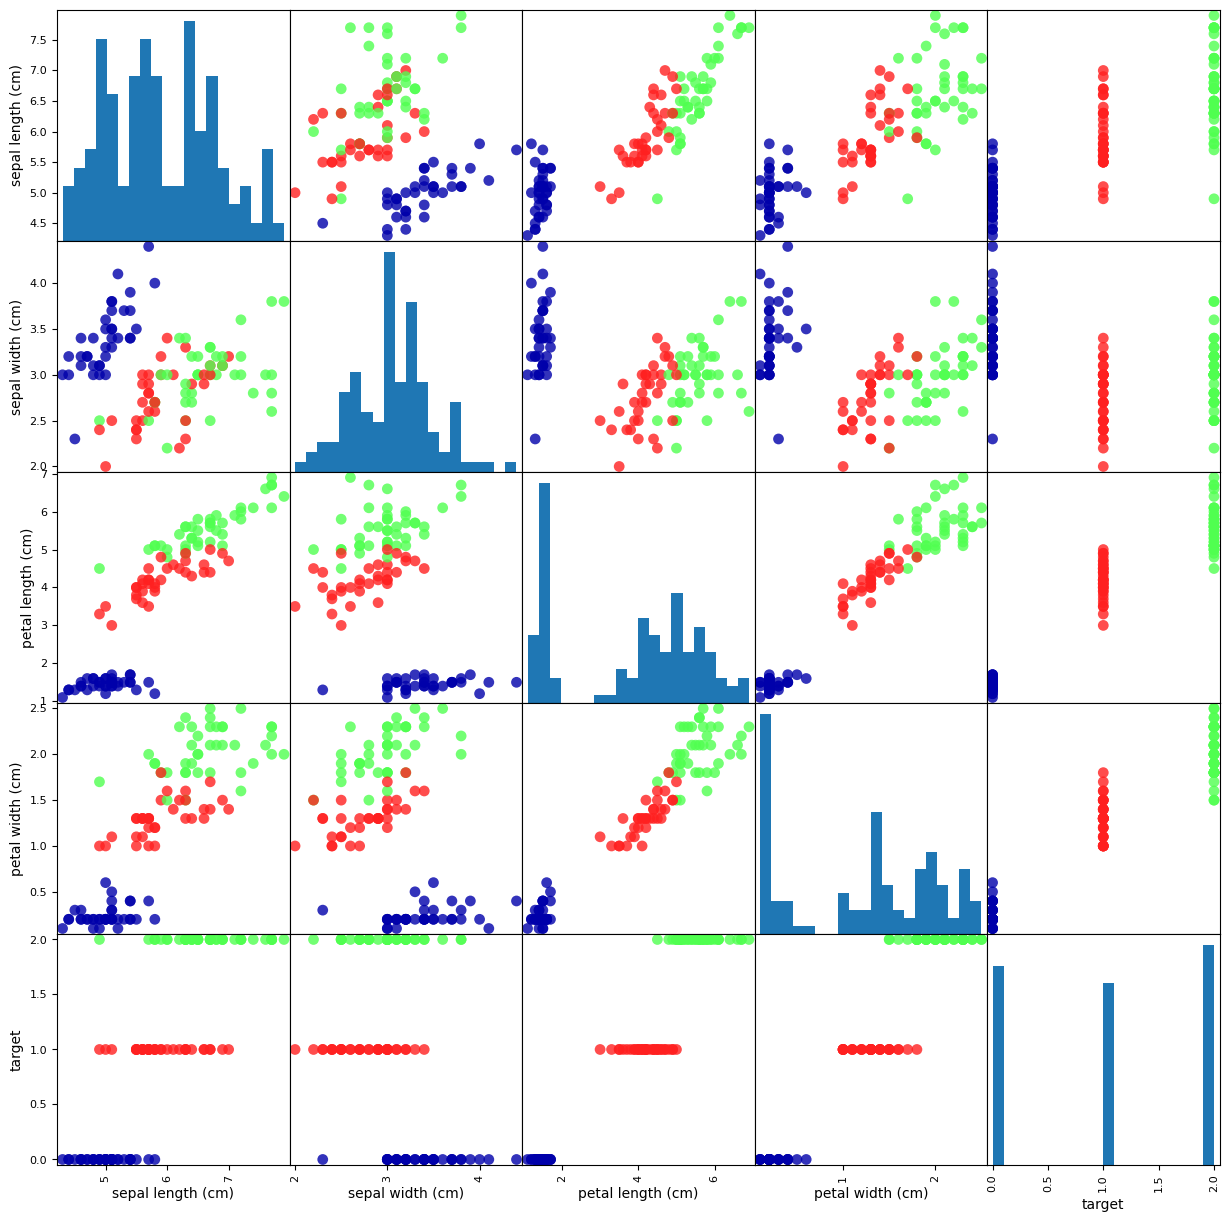

In [8]:

iris_dataframe = pd.DataFrame(X_train,columns=iris_dataset.feature_names)
iris_dataframe['target'] = y_train
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker="o", hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# create a KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

#fit the classifer to the training data
knn.fit(X_train,y_train)

#predict the response for test dataset
y_pred = knn.predict(X_test)



Predictions: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Actual values: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]
Accuracy: 0.9736842105263158
Accuracy score using sklearn's accuracy_score function: 0.9736842105263158
Confusion matrix:
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



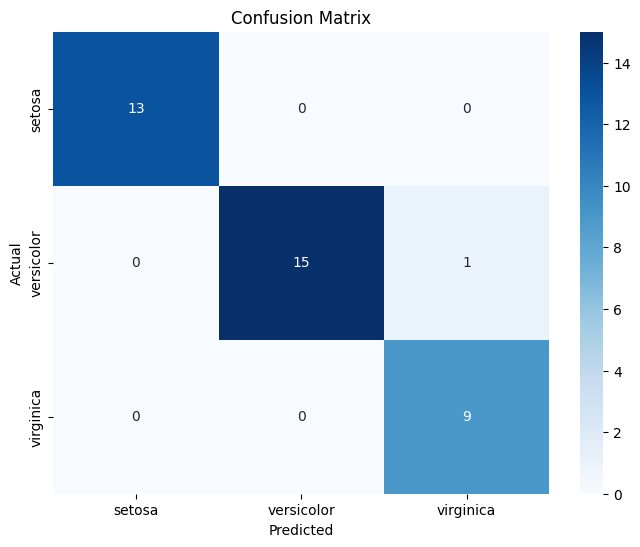

In [10]:
predictions = knn.predict(X_test)
# print the predictions
print("Predictions:", predictions)
# print the actual values   
print("Actual values:", y_test)
# print the accuracy of the model
accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)
# print the accuracy score using sklearn's accuracy_score function
from sklearn.metrics import accuracy_score
accuracy_score_value = accuracy_score(y_test, predictions)
print("Accuracy score using sklearn's accuracy_score function:", accuracy_score_value)
# print the confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, predictions)
print("Confusion matrix:\n", confusion)
# print the classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, predictions, target_names=iris_dataset.target_names)
print("Classification report:\n", report)
# visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=iris_dataset.target_names, yticklabels=iris_dataset.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [12]:
# Define a new sample for prediction (using the first sample from the dataset as an example)
X_new = np.array([iris_dataset['data'][0]])  # shape (1, 4)

prediction = knn.predict(X_new)
print("Prediction:", prediction)
print("Predicted target name:",
       iris_dataset['target_names'][prediction][0])

Prediction: [0]
Predicted target name: setosa
